In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler  # z = x - mu / sigma (standardization)

import scipy
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh
from scipy.spatial.distance import pdist, squareform

# Model datasets

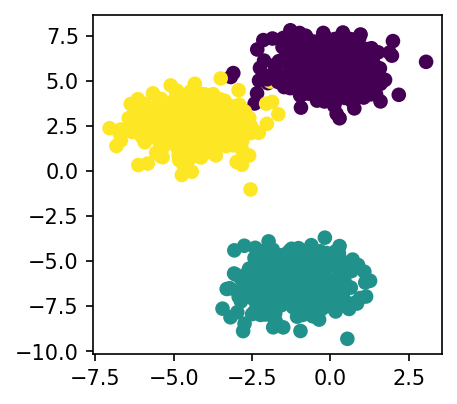

In [2]:
# Blobs
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
X_blobs, y_blobs = datasets.make_blobs(n_samples = 1000, random_state=177)
scaled_y_blob = (y_blobs - y_blobs.min()) / (y_blobs.max() - y_blobs.min())  # 0 to 1 scaling
blob_colors = plt.cm.viridis(scaled_y_blob)
ax.scatter(X_blobs[:, 0], X_blobs[:, 1], color=blob_colors)

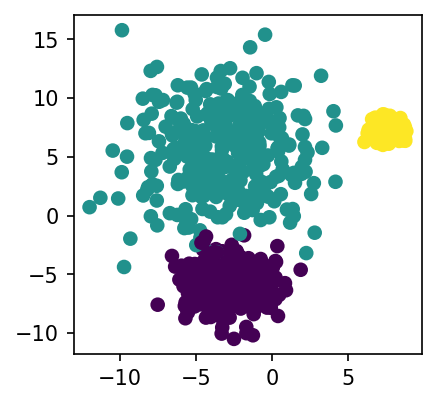

In [3]:
# Varied size blobs
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
X_var, y_var = datasets.make_blobs(n_samples=1000,
                             cluster_std=[1.5, 3.5, 0.5],
                             random_state=176)
scaled_y_var = (y_var - y_var.min()) / (y_var.max() - y_var.min())  # 0 to 1 scaling
var_colors = plt.cm.viridis(scaled_y_var)
ax.scatter(X_var[:, 0], X_var[:, 1], color=var_colors)

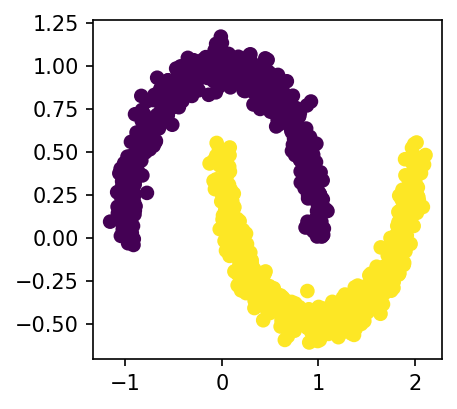

In [4]:
# Noisy moons
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
X_moon, y_moon = datasets.make_moons(n_samples=1000, noise=0.06)
scaled_y_moon = (y_moon - y_moon.min()) / (y_moon.max() - y_moon.min())  # 0 to 1 scaling
moon_colors = plt.cm.viridis(scaled_y_moon)
ax.scatter(X_moon[:, 0], X_moon[:, 1], color=moon_colors)

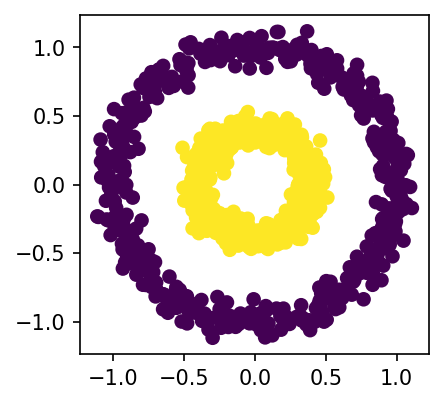

In [5]:
# Noisy circles
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
X_circ, y_circ = datasets.make_circles(n_samples=1000, factor=0.4, noise=0.06)
scaled_y_circ = (y_circ - y_circ.min()) / (y_circ.max() - y_circ.min())  # 0 to 1 scaling
circ_colors = plt.cm.viridis(scaled_y_circ)
ax.scatter(X_circ[:, 0], X_circ[:, 1], color=circ_colors)

# k-Means clustering

Pros: 
- Only need to pick number of clusters.

Cons: 
- Performs poorly on non-linearly-partitionable data [major issue].
- In real world scenarios, might be difficult to choose k.

Text(0.5, 0.98, 'K-means clustering')

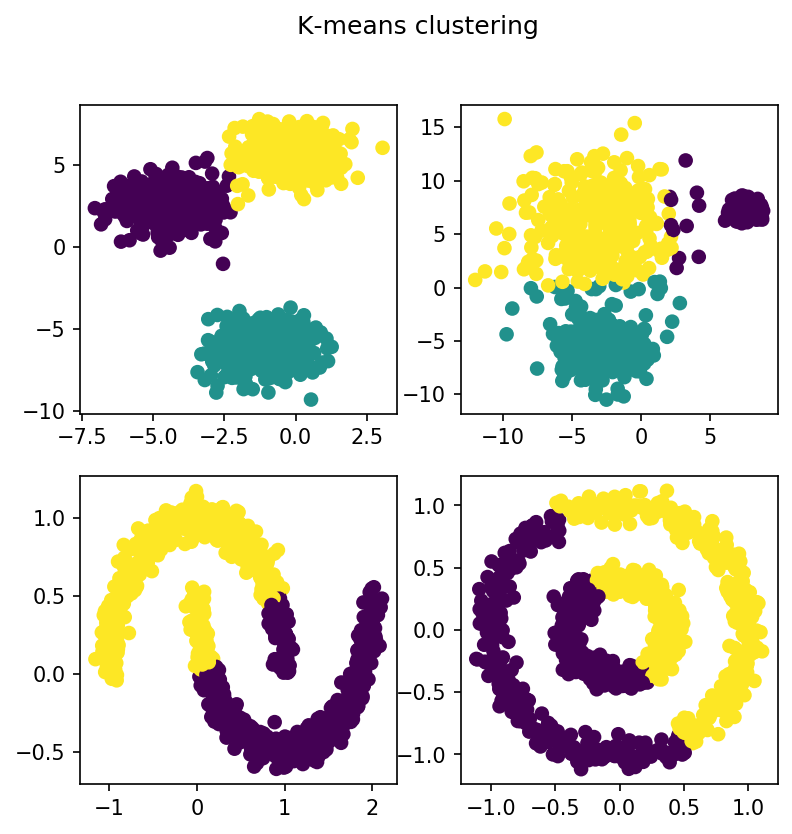

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6), dpi=150)
datasets_list = [X_blobs, X_var, X_moon, X_circ]
n_clusters_list = [3, 3, 2, 2]
for dataidx in range(4):
    X = datasets_list[dataidx]
    n_clusters = n_clusters_list[dataidx]
    X_trans = StandardScaler().fit_transform(X)  # scale data
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0)  # cluster
    c_pred = kmeans.fit_predict(X_trans)
    scaled_c_pred = (c_pred - c_pred.min()) / (c_pred.max() - c_pred.min())
    cluster_colors = plt.cm.viridis(scaled_c_pred)
    ax[dataidx // 2, dataidx % 2].scatter(X[:, 0], X[:, 1], color=cluster_colors)
fig.suptitle("K-means clustering")

# DBSCAN

Pros:
- After tuning parameters, performs quite well on different datasets.

Cons:
- Very sensitive to choice of parameters.
- Parameters are not easy to pick.

Text(0.5, 0.98, 'DBSCAN')

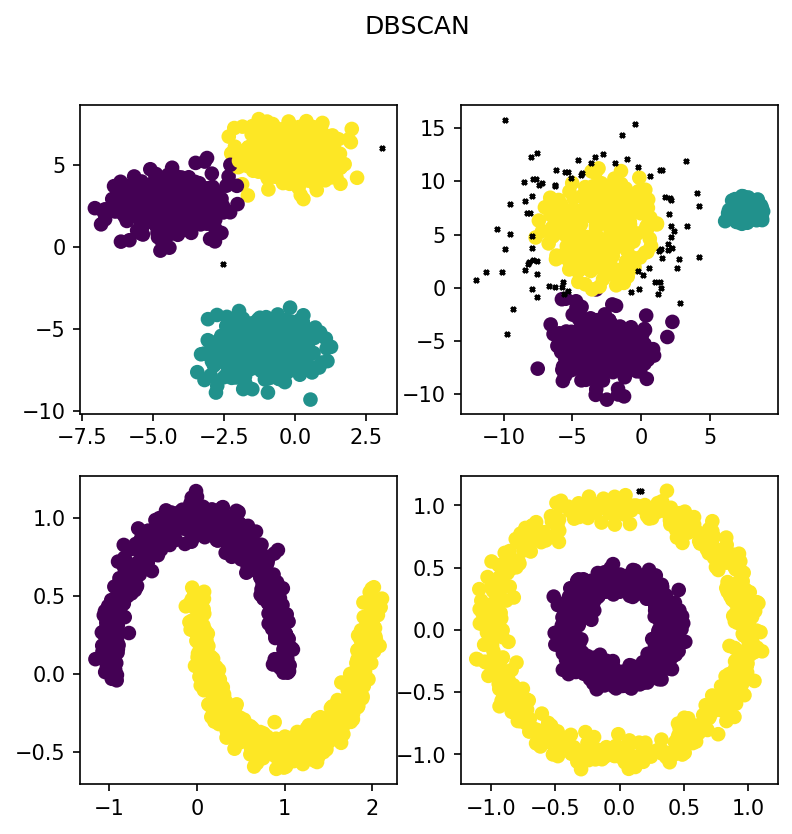

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6), dpi=150)
datasets = [X_blobs, X_var, X_moon, X_circ]
eps_list = [0.4, 0.4, 0.4, 0.2]
min_samples_list = [50, 50, 50, 5]

for dataidx in range(4):
    X = datasets_list[dataidx]
    n_clusters = n_clusters_list[dataidx]
    X_trans = StandardScaler().fit_transform(X)  # scale data
    dbscan = cluster.DBSCAN(eps=eps_list[dataidx], 
                            min_samples=min_samples_list[dataidx],
                            metric='euclidean')  # cluster
    c_pred = dbscan.fit_predict(X_trans)
    
    clustered_idxs = np.where(c_pred != -1)
    noise_idxs = np.where(c_pred == -1)
    
    scaled_c_pred = (c_pred[clustered_idxs] - c_pred[clustered_idxs].min()) / (c_pred[clustered_idxs].max() - c_pred[clustered_idxs].min())
    cluster_colors = plt.cm.viridis(scaled_c_pred)
    
    # Plot clusters
    ax[dataidx // 2, dataidx % 2].scatter(X[clustered_idxs, 0], X[clustered_idxs, 1], color=cluster_colors)
    # Plot noise
    ax[dataidx // 2, dataidx % 2].scatter(X[noise_idxs, 0], X[noise_idxs, 1], s=5, marker='x', color='k')
fig.suptitle("DBSCAN")

# Spectral clustering with nearest neighbors graph connectivity

Pros:
- Natural metric
- Only need to pick number of clusters and a parameter for construction of the affinity matrix.

Cons:
- Need to choose a distance metric (may not neccessarily be a con, depending on application can be a pro), and may need to parameterize the distance metric.
- Need to pick number of clusters (but there are heuristics to get around this!)

/Users/apallath/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/apallath/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5, 0.98, 'Spectral clustering')

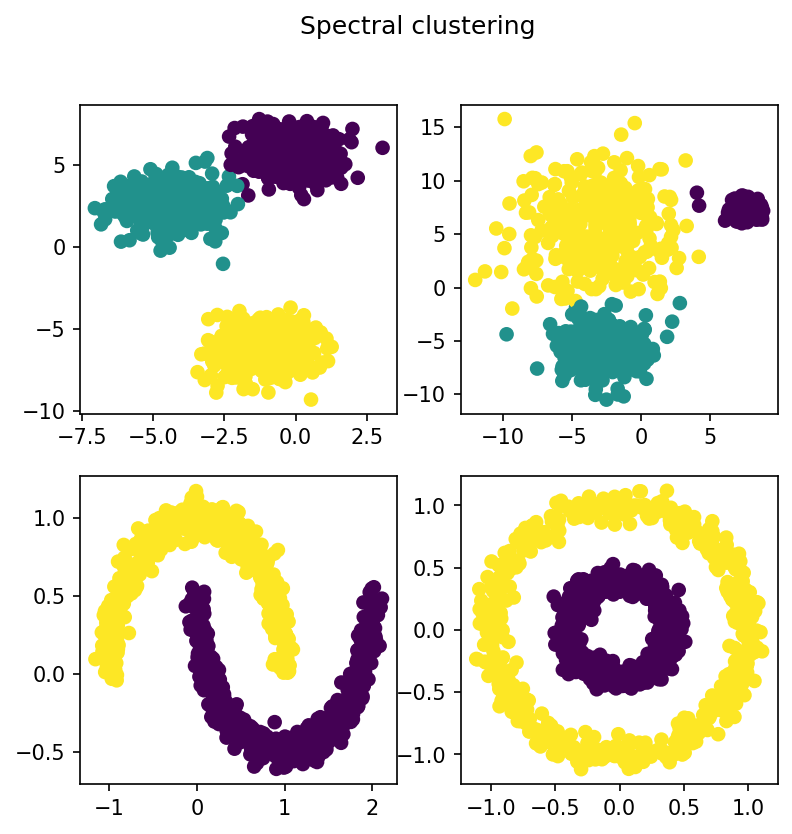

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6), dpi=150)
datasets = [X_blobs, X_var, X_moon, X_circ]
n_clusters_list = [3, 3, 2, 2]
for dataidx in range(4):
    X = datasets_list[dataidx]
    n_clusters = n_clusters_list[dataidx]
    X_trans = StandardScaler().fit_transform(X)  # scale data
    spectral = cluster.SpectralClustering(n_clusters=n_clusters,
                                          affinity='nearest_neighbors',
                                          eigen_solver='arpack',
                                          n_neighbors=30)  # cluster
    c_pred = spectral.fit_predict(X_trans)
    scaled_c_pred = (c_pred - c_pred.min()) / (c_pred.max() - c_pred.min())
    cluster_colors = plt.cm.viridis(scaled_c_pred)
    ax[dataidx // 2, dataidx % 2].scatter(X[:, 0], X[:, 1], color=cluster_colors)
fig.suptitle("Spectral clustering")

# Spectral clustering with Gaussian (RBF) affinity matrix

Here, we apply the radial basis function kernel to the data to compute the similarity between two data points. The radial basis function kernel is given by:

$$RBF(x_1, x_2) = \exp \left( -\frac{||x_1 - x_2||^2}{\sigma^2} \right)$$

The hyperparameter $\sigma$ determines how far apart two points can be for them to be considered similar.

## Manually picking the kernel hyperparameter

To pick the Gaussian kernel hyperparameter ($\sigma$, or rather $\gamma = \frac{1}{\sigma^2}$), we first need to visualize the spread of the standardized data.

Text(0.5, 0.98, 'Standardized datasets')

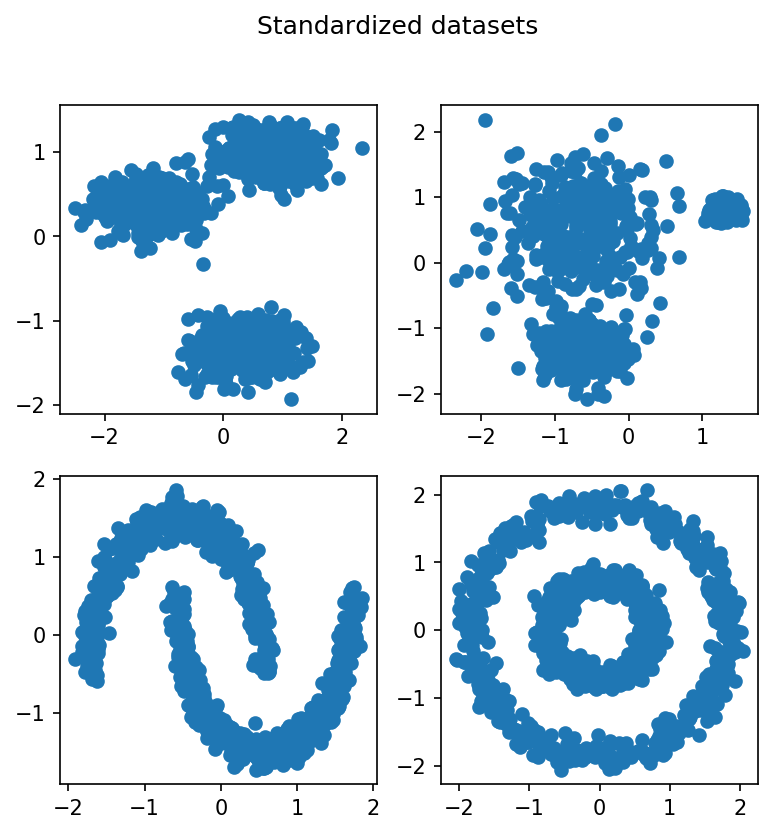

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6), dpi=150)
datasets = [X_blobs, X_var, X_moon, X_circ]
for dataidx in range(4):
    X = datasets_list[dataidx]
    n_clusters = n_clusters_list[dataidx]
    X_trans = StandardScaler().fit_transform(X)  # scale data
    ax[dataidx // 2, dataidx % 2].scatter(X_trans[:, 0], X_trans[:, 1])
fig.suptitle("Standardized datasets")

Text(0.5, 0.98, 'Spectral clustering')

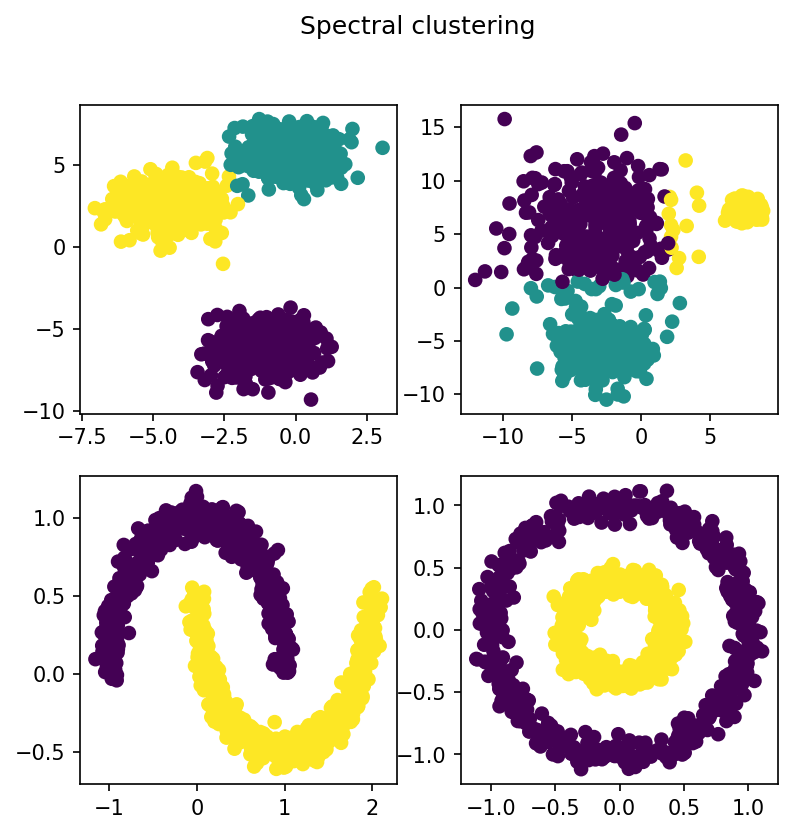

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6), dpi=150)
datasets = [X_blobs, X_var, X_moon, X_circ]
n_clusters_list = [3, 3, 2, 2]
sigmas = [1, 1, 0.25, 0.1]
gammas = [1 / (sigma ** 2) for sigma in sigmas]
for dataidx in range(4):
    X = datasets_list[dataidx]
    n_clusters = n_clusters_list[dataidx]
    X_trans = StandardScaler().fit_transform(X)  # scale data
    spectral = cluster.SpectralClustering(n_clusters=n_clusters,
                                          affinity='rbf',
                                          eigen_solver='arpack',
                                          gamma=gammas[dataidx])  # cluster
    c_pred = spectral.fit_predict(X_trans)
    scaled_c_pred = (c_pred - c_pred.min()) / (c_pred.max() - c_pred.min())
    cluster_colors = plt.cm.viridis(scaled_c_pred)
    ax[dataidx // 2, dataidx % 2].scatter(X[:, 0], X[:, 1], color=cluster_colors)
fig.suptitle("Spectral clustering")

# Picking the number of clusters using the eigengap heuristic

**Not straightforward, need a trial and error approach to find the best value for number of clusters.**

In [11]:
def laplacian_eigendecomposition(A, k):
    L = csgraph.laplacian(A, normed=True)
    eigvals, eigvects = eigsh(L, k=k, which='LM')
    return eigvals, eigvects

## Eigenvalues of the graph Laplacian

We look at the gaps between the top-k eigenvalues of the graph Laplacian to pick the number of clusters.

When calculating the affinity matrix, we know the average size of our clusters is large, so we set K=50

[1.01112828 1.01067674 1.00951955 1.00901745 1.00890257 1.00867906
 1.00855494 1.00844844 1.00816916 1.00770856 1.00769677 1.00756805
 1.00741777 1.00740187 1.00740147 1.00725693 1.00724649 1.00720658
 1.00714243 1.00713304 1.00698241 1.00696987 1.00694065 1.00685995
 1.00684602 1.00677387 1.00676677 1.00672117 1.00662555 1.00655153
 1.00653567 1.00640776 1.00639796 1.0063245  1.00629626 1.00625195
 1.00617772 1.00616525 1.00615619 1.0061432  1.00612926 1.0060938
 1.00605763 1.00602082 1.00601319 1.00597821 1.00593306 1.00587885
 1.0058684  1.00586291]
[1.02736193 1.02420206 1.01931475 1.01760571 1.01557977 1.01457002
 1.01308853 1.0126824  1.01214255 1.01163182 1.01113735 1.01102359
 1.01089547 1.01034478 1.01021826 1.01011299 1.00998221 1.00986203
 1.00984733 1.00959292 1.00952815 1.00922006 1.00897546 1.00891297
 1.00885387 1.00877588 1.00852931 1.00845532 1.00808175 1.00807759
 1.00803261 1.00797494 1.00796463 1.00786619 1.0078061  1.00777623
 1.00773646 1.00768373 1.00763727 1.007

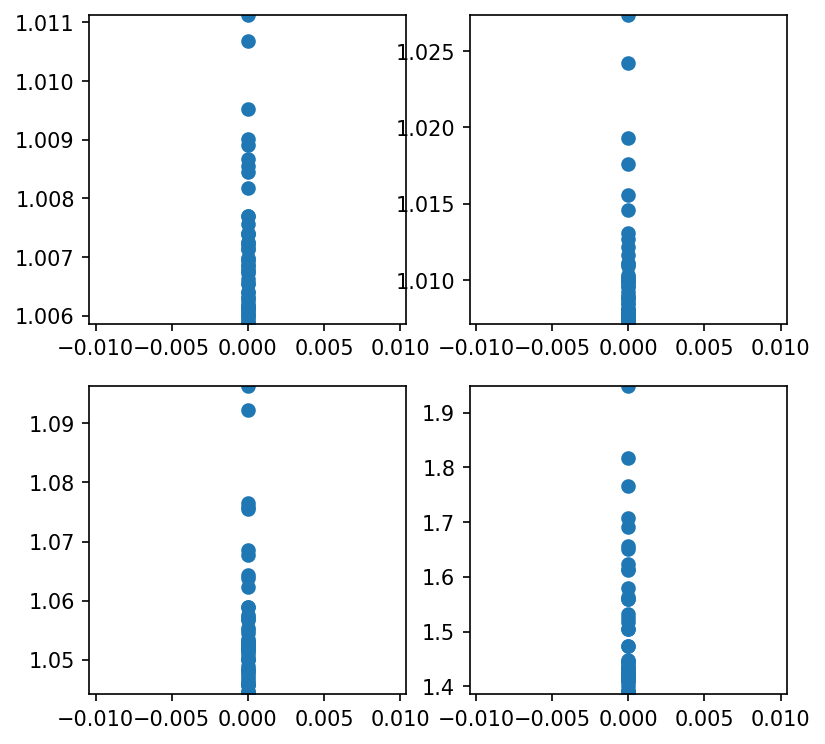

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6), dpi=150)
datasets = [X_blobs, X_var, X_moon, X_circ]
sigmas = [1, 1, 0.25, 0.1]
gammas = [1 / (sigma ** 2) for sigma in sigmas]
for dataidx in range(4):
    X = datasets_list[dataidx]
    X_trans = StandardScaler().fit_transform(X)  # scale data
    spectral = cluster.SpectralClustering(n_clusters=1,
                                          affinity='rbf',
                                          eigen_solver='arpack',
                                          gamma=gammas[dataidx])
    A = spectral.fit(X_trans).affinity_matrix_
    eigvals, eigvects = laplacian_eigendecomposition(A, k=50)
    print(eigvals[::-1])
    ax[dataidx // 2, dataidx % 2].scatter(np.zeros(len(eigvals)), eigvals)
    ax[dataidx // 2, dataidx % 2].set_ylim(eigvals.min(), eigvals.max())

Text(0.5, 0.98, 'Spectral clustering')

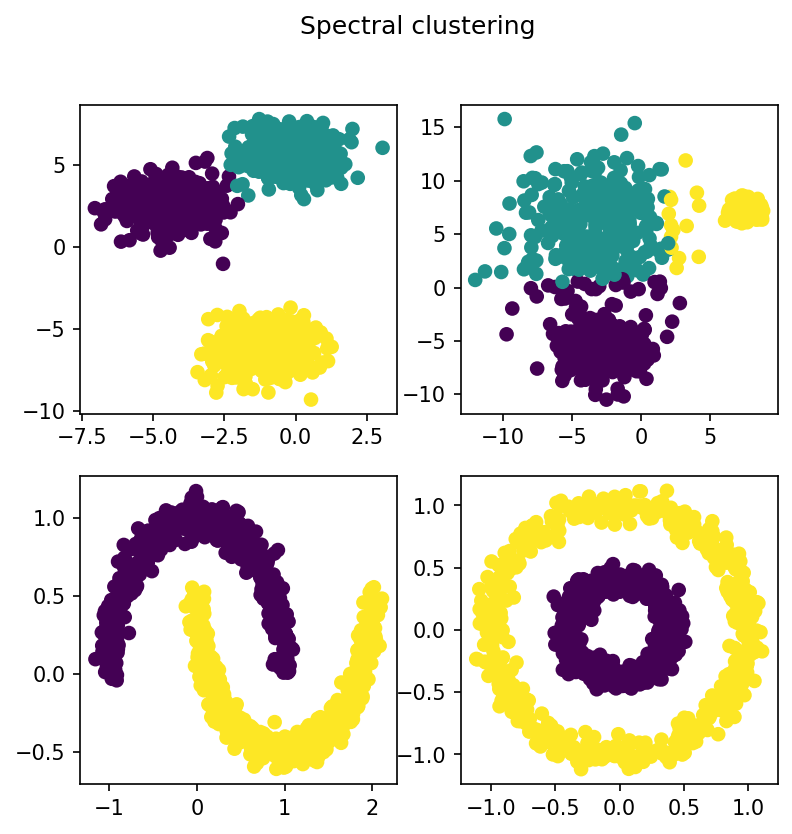

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6), dpi=150)
datasets = [X_blobs, X_var, X_moon, X_circ]
n_clusters_list = [3, 3, 2, 2]
sigmas = [1, 1, 0.25, 0.1]
gammas = [1 / (sigma ** 2) for sigma in sigmas]
for dataidx in range(4):
    X = datasets_list[dataidx]
    X_trans = StandardScaler().fit_transform(X)  # scale data
    n_clusters = n_clusters_list[dataidx]
    spectral = cluster.SpectralClustering(n_clusters=n_clusters_list[dataidx],
                                          affinity='rbf',
                                          eigen_solver='arpack',
                                          gamma=gammas[dataidx])
    c_pred = spectral.fit_predict(X_trans)
    scaled_c_pred = (c_pred - c_pred.min()) / (c_pred.max() - c_pred.min())
    cluster_colors = plt.cm.viridis(scaled_c_pred)
    ax[dataidx // 2, dataidx % 2].scatter(X[:, 0], X[:, 1], color=cluster_colors)
fig.suptitle("Spectral clustering")